In [29]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd

In [31]:
df=pd.read_csv("loan_approval_dataset.csv")

In [32]:
df.shape

(4269, 13)

In [33]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [34]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [35]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [36]:
df.columns = df.columns.str.strip()  # Removes leading & trailing spaces

In [37]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [39]:
!pip install seaborn

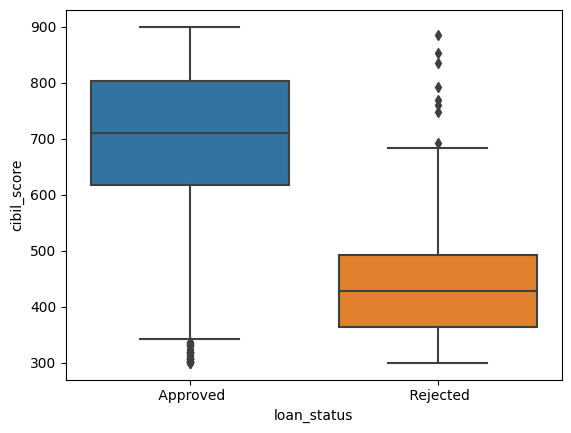

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["loan_status"], y=df["cibil_score"])
plt.show()

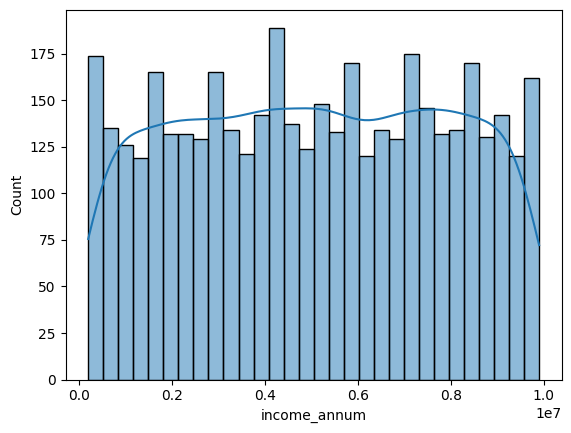

In [41]:
sns.histplot(df["income_annum"], bins=30, kde=True)
plt.show()

In [42]:
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Convert 'loan_status' (Target Variable)
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,NaN,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,NaN,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,NaN,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,NaN,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,NaN,1,1


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
               'residential_assets_value', 'commercial_assets_value', 
               'luxury_assets_value', 'bank_asset_value']

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_id', 'loan_status'])  # Features
y = df['loan_status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
!pip install xgboost

In [48]:
print(y_train.isnull().sum())  # Check missing values

3415


In [49]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]  # Keep only corresponding X values

In [50]:
print(y_train.unique())

[]


In [51]:
print(y_train.shape)

(0,)


In [53]:
print(y.isnull().sum())  # Check if `y` has missing values

4269


In [54]:
print(df.columns)  # Ensure 'loan_status' exists
print(df['loan_status'].head())  # Check first few values

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: loan_status, dtype: float64


In [55]:
print(df['loan_status'].unique())  # Check original values before mapping

[nan]


In [57]:
print(df.columns.tolist())  # Display all column names

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [58]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

In [59]:
print(df.columns.tolist())  # Check again if 'loan_status' is correct

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [60]:
if 'loan_status' in df.columns:
    print("Column found! Unique values:", df['loan_status'].unique())
else:
    print("Column 'loan_status' not found in dataset!")

Column found! Unique values: [' Approved' ' Rejected']


In [61]:
print(df['loan_status'].unique())  # Should work now!

[' Approved' ' Rejected']


In [62]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [63]:
print(df['loan_status'].isnull().sum())  # Should be 0

4269


In [65]:
# Remove spaces in column names
df.columns = df.columns.str.strip()

# Ensure 'loan_status' values are correctly formatted
df['loan_status'] = df['loan_status'].astype(str).str.strip()  # Remove spaces

# Now map values correctly
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Check if NaNs are removed
print(df['loan_status'].isnull().sum())  # Should be 0

0


In [66]:
df = df.dropna(subset=['loan_status'])  # Remove rows with missing target values

In [67]:
print(df['loan_status'].isnull().sum())  # Should now be 0
print(df['loan_status'].unique())  # Should return [1 0]

0
[1 0]


In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_id', 'loan_status'])  # Features
y = df['loan_status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.unique())  # Should return [1 0]

[1 0]


In [70]:
print(X.dtypes)

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
dtype: object


In [71]:
X = pd.get_dummies(X, columns=['education', 'self_employed'], drop_first=True)

In [72]:
print(X.dtypes)  # Should now be all int/float

no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
education_ Not Graduate     uint8
self_employed_ Yes          uint8
dtype: object


In [74]:
print(X_train.dtypes)

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
dtype: object


In [75]:
X_train = pd.get_dummies(X_train, columns=['education', 'self_employed'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['education', 'self_employed'], drop_first=True)

In [76]:
print(X_train.dtypes)

no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
education_ Not Graduate     uint8
self_employed_ Yes          uint8
dtype: object


In [78]:
print(X_train['education_ Not Graduate'].unique())
print(X_train['self_employed_ Yes'].unique())

[0 1]
[0 1]


In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9859484777517564
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



In [80]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
                        param_grid=params, cv=5, scoring='accuracy', verbose=2)

xgb_grid.fit(X_train, y_train)

print("Best Parameters:", xgb_grid.best_params_)
print("Best Accuracy:", xgb_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

In [81]:
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric="logloss",
                          learning_rate=0.1, max_depth=7, n_estimators=200)

xgb_final.fit(X_train, y_train)
y_pred_xgb_final = xgb_final.predict(X_test)

print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_final))
print(classification_report(y_test, y_pred_xgb_final))

Final XGBoost Accuracy: 0.9847775175644028
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [82]:
import joblib

# Save the model
joblib.dump(xgb_final, "loan_approval_model.pkl")

# Load the model (for testing)
model = joblib.load("loan_approval_model.pkl")

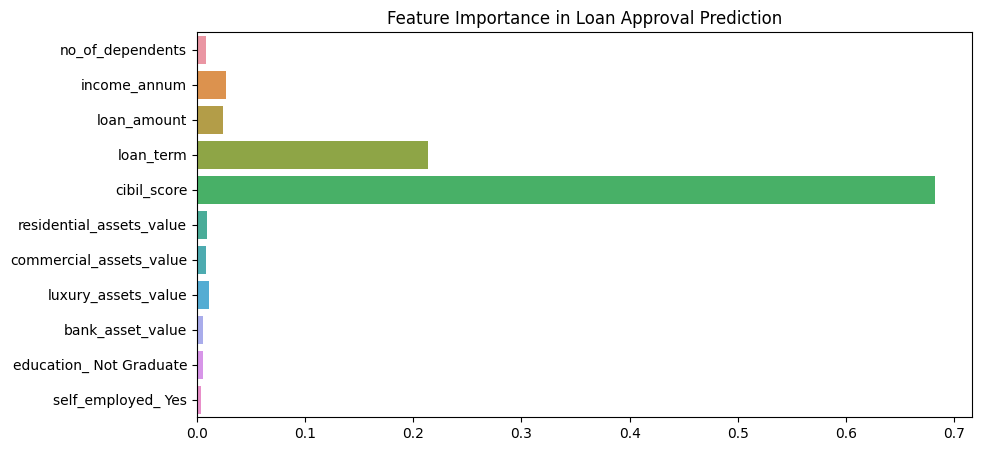

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = xgb_final.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()

In [85]:
!pip install streamlit

In [91]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load("loan_approval_model.pkl")

# Title of the web app
st.title("🏦 Loan Approval Prediction System")

# User input fields
income_annum = st.number_input("Annual Income (in INR)", min_value=0, step=10000)
loan_amount = st.number_input("Loan Amount Requested (in INR)", min_value=0, step=10000)
loan_term = st.number_input("Loan Term (in months)", min_value=1, step=6)
cibil_score = st.number_input("CIBIL Score (300-900)", min_value=300, max_value=900, step=10)
residential_assets_value = st.number_input("Residential Assets Value (in INR)", min_value=0, step=10000)
commercial_assets_value = st.number_input("Commercial Assets Value (in INR)", min_value=0, step=10000)
luxury_assets_value = st.number_input("Luxury Assets Value (in INR)", min_value=0, step=10000)
bank_assets_value = st.number_input("Bank Asset Value (in INR)", min_value=0, step=10000)

education = st.selectbox("education_ Not Graduate", ["Graduate", "Not Graduate"])
self_employed_Yes = st.selectbox("self_employed_ Yes", ["No", "Yes"])

# Convert categorical inputs to numeric
education = 1 if education == "Not Graduate" else 0
self_employed_Yes = 1 if self_employed_Yes == "Yes" else 0

# Prediction button
if st.button("Check Loan Approval"):
    # Prepare input for model
    input_data = np.array([[income_annum, loan_amount, loan_term, cibil_score,
                            residential_assets_value, commercial_assets_value, luxury_assets_value,
                            bank_assets_value, education, self_employed_Yes]])
    
    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display result
    if prediction == 1:
        st.success("✅ Congratulations! Your Loan is Approved.")
    else:
        st.error("❌ Sorry, Your Loan is Rejected.")


2025-03-08 00:13:57.970 
  command:

    streamlit run C:\Users\Parni Agrawal\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
import joblib
import xgboost as xgb

# Load old model
model = joblib.load("loan_approval_model.pkl")

# Re-save the model using XGBoost's latest save method
model.get_booster().save_model("loan_approval_model_new.json")